# 1. Meet the Data

In [2]:
# load datasets from sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
# check keys of dict
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# why different ? bcs print-func ingore char '\n' when excute 
print(iris_dataset['DESCR'][:193])

iris_dataset['DESCR'][:193]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre


'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, pre'

**Input**

In [5]:
# check type of data 
print(type(iris_dataset['data']))

# check shape
print(iris_dataset['data'].shape)

<class 'numpy.ndarray'>
(150, 4)


In [6]:
# check data 
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# check feature input 
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Output**

In [8]:
# check target output name 
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# check target: contains the species of each of the flowers that were measured 0,1,2

#check type
print(type(iris_dataset['target']))
print(iris_dataset['target'].shape)
print(iris_dataset['target'])

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 2. Spilit the Data

`scikit-learn` contains a function that shuffles the dataset and splits it for you: the `train_test_split` function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. Deciding how much data you want to put into the training and the test set respectively is some‐ what arbitrary, but using a test set containing 25% of the data is a good rule of thumb.

In `scikit-learn`, data is usually denoted with **X**, while labels are denoted by **y**. This is inspired by the standard formulation f(**X**)= **y** in mathematics.

* Before making the split, the `train_test_split` function shuffles the dataset using a pseudorandom number generator.

* To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the `random_state` parameter.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],random_state = 0)

In [11]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


# 3. Look at your Data: Visualize
**Scatter plot**: A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. Unfortunately, computer screens have only two dimensions, which allows us to plot only two (or maybe three) features at a time. It is difficult to plot datasets with more than three features this way. 

**Pair Plot**: looks at all possible pairs of features. If you have a small number of features, such as the four we have here, this is quite reasonable. You should keep in mind, however, that a pair plot does not show the interaction of all of features at once, so some interesting aspects of the data may not be revealed when visualizing it this way.

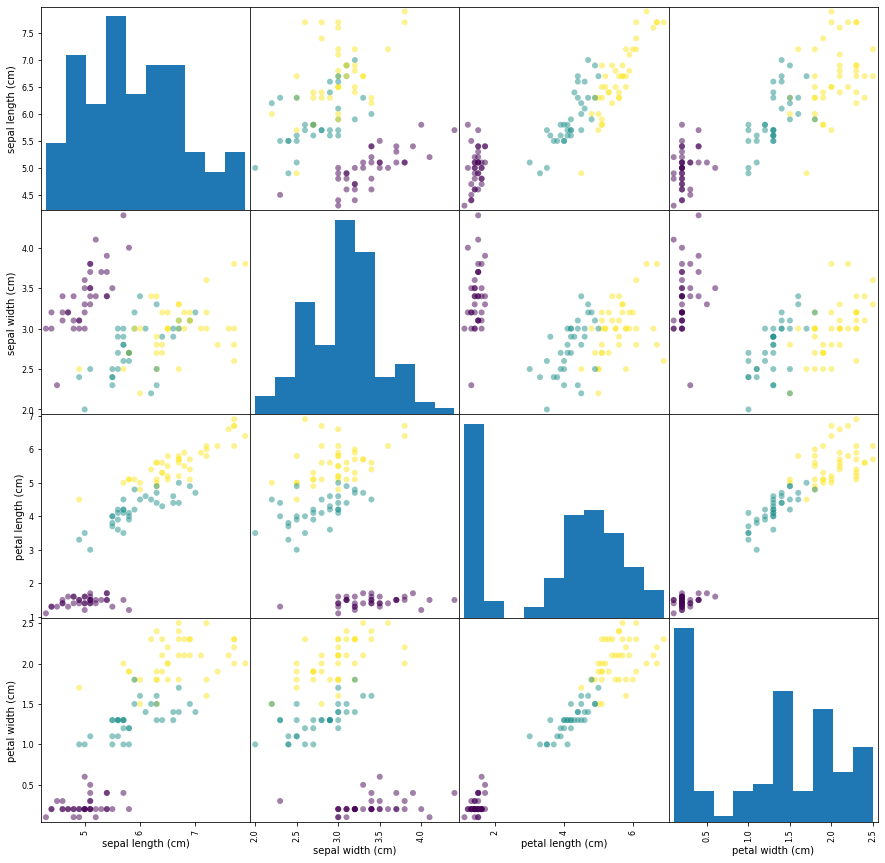

In [12]:
%matplotlib inline
import pandas as pd

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_df = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

## create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_df, c = y_train, figsize = (15,15), marker = 'o');

# 4. k - Nearest Neighbors

The k in `k-nearest neighbors` signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors)

All machine learning models in `scikit-learn` are implemented in their own classes, which are called `Estimator` classes. The k-nearest neighbors classification algorithm is implemented in the `KNeighborsClassifier` class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of `KNeighborsClassifier` is the number of neighbors `n_neighbors`, in here we will set to 1:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)

In [14]:
# fit training data + run algorithms to find parameters.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 4.1. Making Predictions

In [15]:
import numpy as np

# abitrary array 
X_new = np.array([[5, 3, 1, 0.4]])

print(X_new.ndim, X_new.shape, sep = '\n')

2
(1, 4)


Note that we made the measurements of this single flower into a row in a two- dimensional NumPy array, as `scikit-learn` **always expects two-dimensional arrays** for the data.

In [16]:
# predict w abitrary array 
prediction = knn.predict(X_new)

# print measure 
print(prediction)

# print name 
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


# 4.2. Evaluating the Model

In [17]:
# check predict w test set.
y_pred = knn.predict(X_test)

y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [18]:
# check boolean with T F of test & predict
print(y_pred == y_test)

# score: mean of [arr] with True = 1, False = 0
print(np.mean(y_pred == y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
0.9736842105263158
